In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/Plant_1_Generation_Data.csv")
df.head(7000)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6183645.000
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,6987759.000
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7602960.000
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7158964.000
...,...,...,...,...,...,...,...
6995,18-05-2020 11:15,4135001,VHMLBKoKgIrUVDU,7270.714286,711.928571,1192.000000,7228289.000
6996,18-05-2020 11:15,4135001,WRmjgnKYAwPKWDb,7116.375000,696.862500,1170.250000,7050274.250
6997,18-05-2020 11:15,4135001,YxYtjZvoooNbGkE,7155.857143,700.728571,1159.857143,7201388.857
6998,18-05-2020 11:15,4135001,ZnxXDlPa8U1GXgE,7154.428571,700.585714,1168.000000,6543906.000


In [24]:
df3 = pd.read_csv("data/Plant_2_Generation_Data.csv")
df3.head(7)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.000000,0.000000,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.000000,0.000000,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.000000,0.000000,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.000000,0.000000,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
6995,2020-05-18 07:30:00,4136001,xoJJ8DcxJEcupym,27.492857,26.557143,7.000000,2.091559e+08
6996,2020-05-18 07:45:00,4136001,4UPUqMRk7TRMgml,62.378571,60.400000,18.000000,2.445249e+06
6997,2020-05-18 07:45:00,4136001,81aHJ1q11NBPMrL,64.026667,62.026667,18.266667,1.215293e+09
6998,2020-05-18 07:45:00,4136001,9kRcWv60rDACzjR,63.720000,61.720000,18.933333,2.247743e+09


In [16]:
df2 = pd.read_csv("data/Plant_1_Weather_Sensor_Data.csv")
df2.head(100)




,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
95,2020-05-16 02:30:00,4135001,HmiyD2TTLFNqkNe,21.510409,19.592692,0.0
96,2020-05-16 02:45:00,4135001,HmiyD2TTLFNqkNe,21.496287,19.624870,0.0
97,2020-05-16 03:00:00,4135001,HmiyD2TTLFNqkNe,21.645913,20.065206,0.0
98,2020-05-16 03:15:00,4135001,HmiyD2TTLFNqkNe,21.674314,20.112160,0.0


2020-05-15 00:00:00 2020-06-17 23:45:00
0.0 1.2216518466666668
20.398504866666663 35.25248613333334
18.140415466666663 65.54571366666664


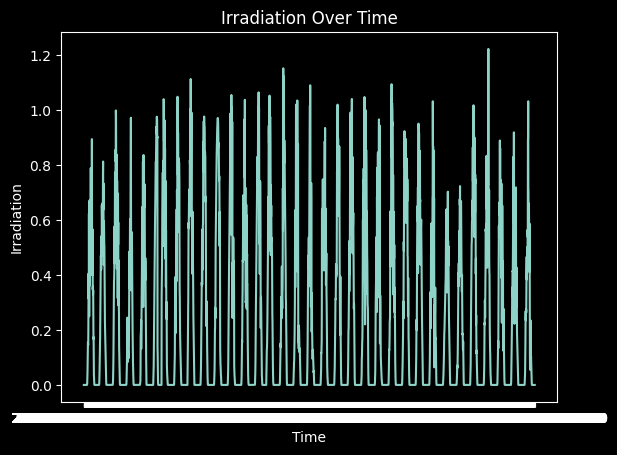

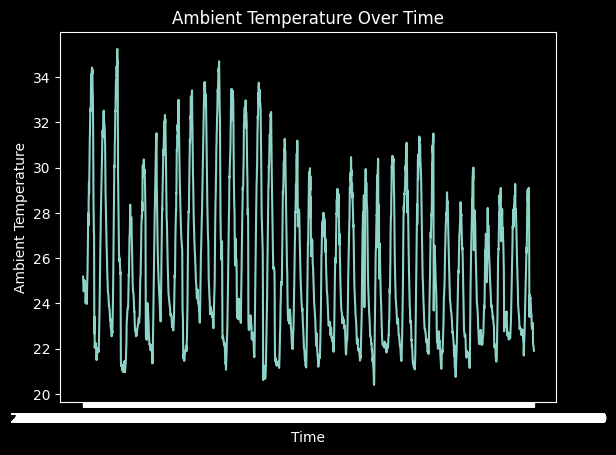

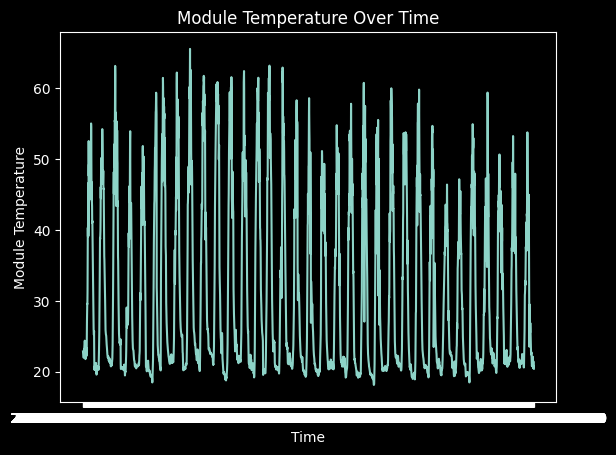

In [20]:
print(df2["DATE_TIME"].min(), df2["DATE_TIME"].max())

print(df2["IRRADIATION"].min(), df2["IRRADIATION"].max())
print(df2["AMBIENT_TEMPERATURE"].min(), df2["AMBIENT_TEMPERATURE"].max())
print(df2["MODULE_TEMPERATURE"].min(), df2["MODULE_TEMPERATURE"].max())

plt.figure()
plt.plot(df2["DATE_TIME"], df2["IRRADIATION"])
plt.xlabel("Time")
plt.ylabel("Irradiation")
plt.title("Irradiation Over Time")
plt.show()

plt.figure()
plt.plot(df2["DATE_TIME"], df2["AMBIENT_TEMPERATURE"])
plt.xlabel("Time")
plt.ylabel("Ambient Temperature")
plt.title("Ambient Temperature Over Time")
plt.show()

plt.figure()
plt.plot(df2["DATE_TIME"], df2["MODULE_TEMPERATURE"])
plt.xlabel("Time")
plt.ylabel("Module Temperature")
plt.title("Module Temperature Over Time")
plt.show()

(68778, 7)
22


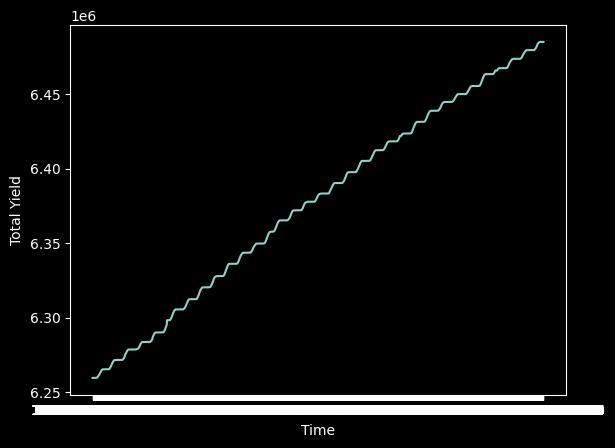

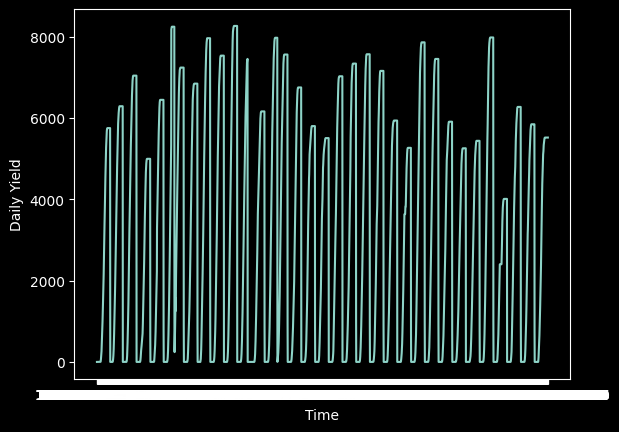

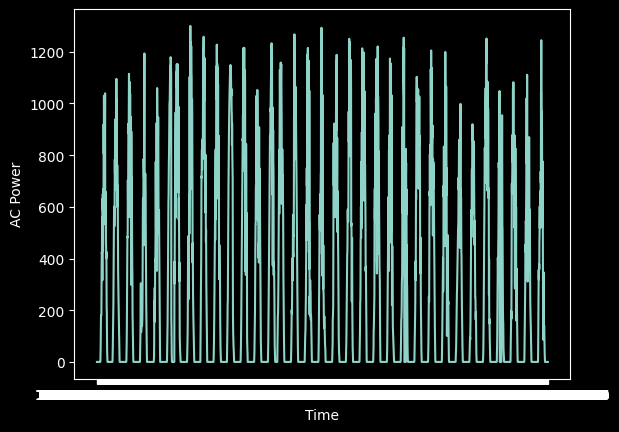

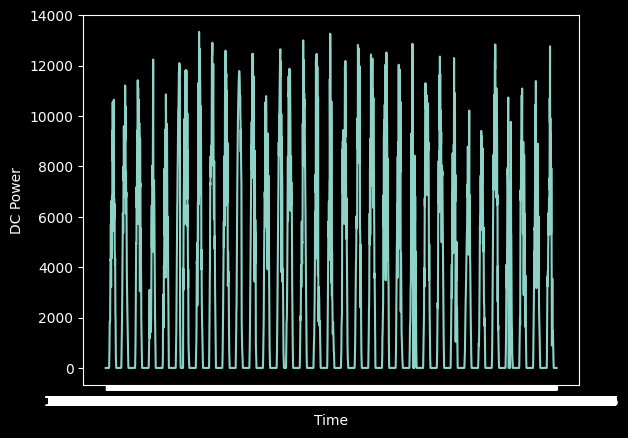

In [29]:
print(df.shape)
print(df['SOURCE_KEY'].nunique())

df_ex = df[df["SOURCE_KEY"] == '1BY6WEcLGh8j5v7']

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["TOTAL_YIELD"])
plt.xlabel("Time")
plt.ylabel("Total Yield")
plt.show()

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["DAILY_YIELD"])
plt.xlabel("Time")
plt.ylabel("Daily Yield")
plt.show()

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["AC_POWER"])
plt.xlabel("Time")
plt.ylabel("AC Power")
plt.show()

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["DC_POWER"])
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.show()

In [32]:
%%sql
SELECT DATE_TIME, AVG(DC_POWER) AVG_DC_POWER, AVG(AC_POWER) AVG_AC_POWER, AVG(DAILY_YIELD) AVG_DAILY_YIELD FROM df
GROUP BY DATE_TIME;

,DATE_TIME,AVG_DC_POWER,AVG_AC_POWER,AVG_DAILY_YIELD
0,15-05-2020 00:45,0.000000,0.000000,0.000000
1,15-05-2020 02:45,0.000000,0.000000,0.000000
2,15-05-2020 03:00,0.000000,0.000000,0.000000
3,15-05-2020 09:45,7335.001623,717.868750,1115.153680
4,15-05-2020 19:30,0.000000,0.000000,6247.357143
...,...,...,...,...
3153,17-06-2020 04:45,0.000000,0.000000,0.000000
3154,17-06-2020 08:30,4071.636364,400.028571,484.272727
3155,17-06-2020 11:15,7986.976461,781.777597,2111.409091
3156,17-06-2020 20:45,0.000000,0.000000,5889.590909


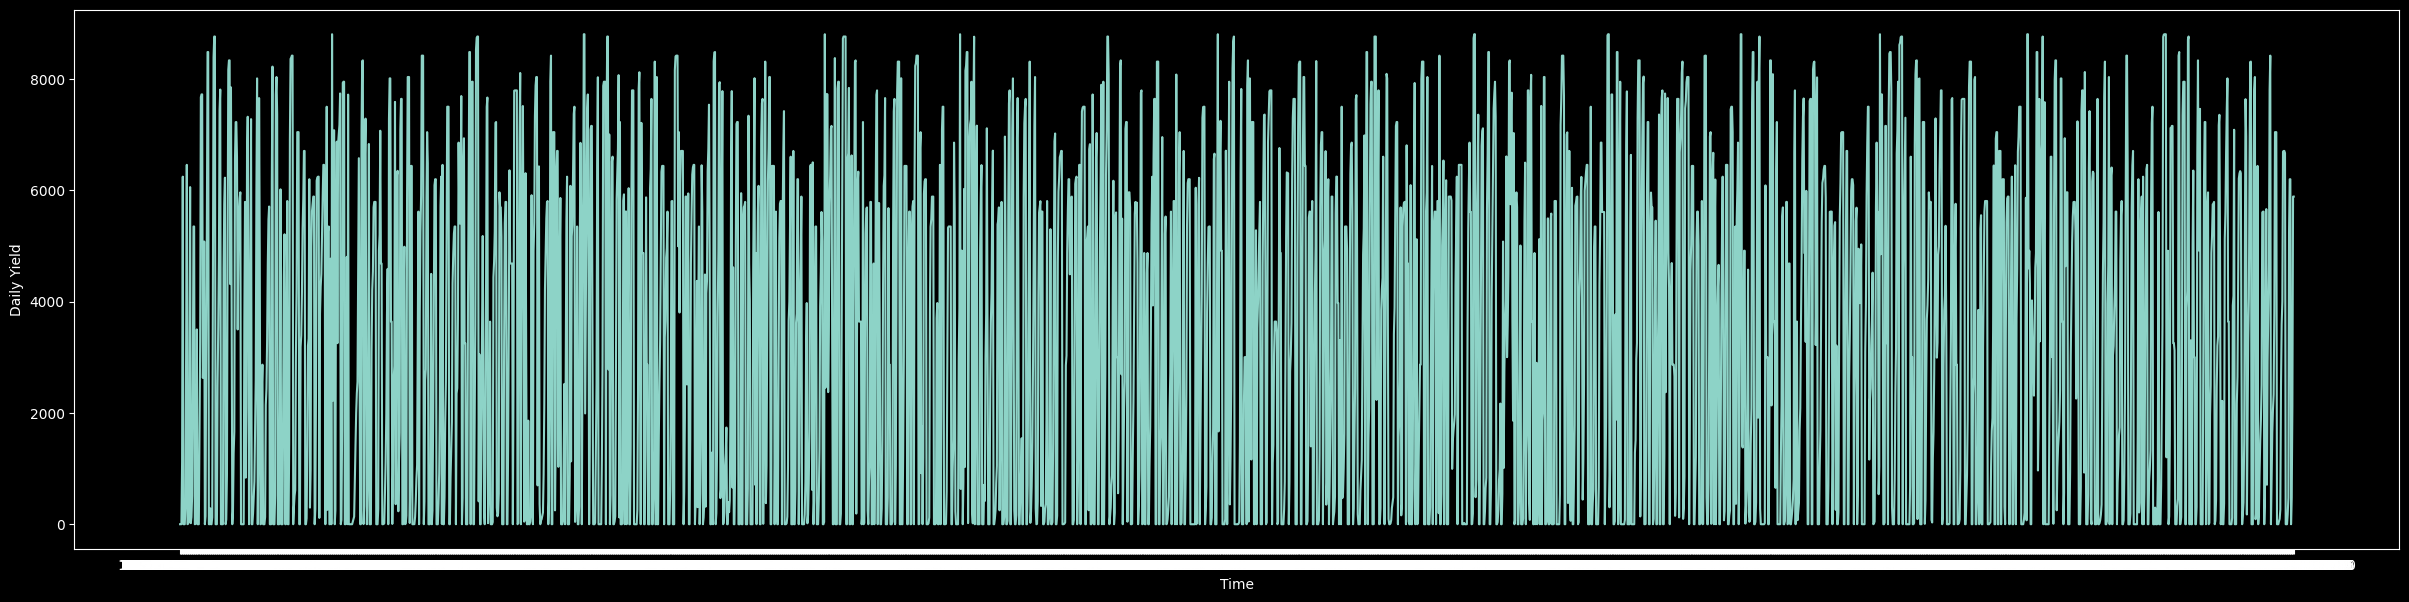

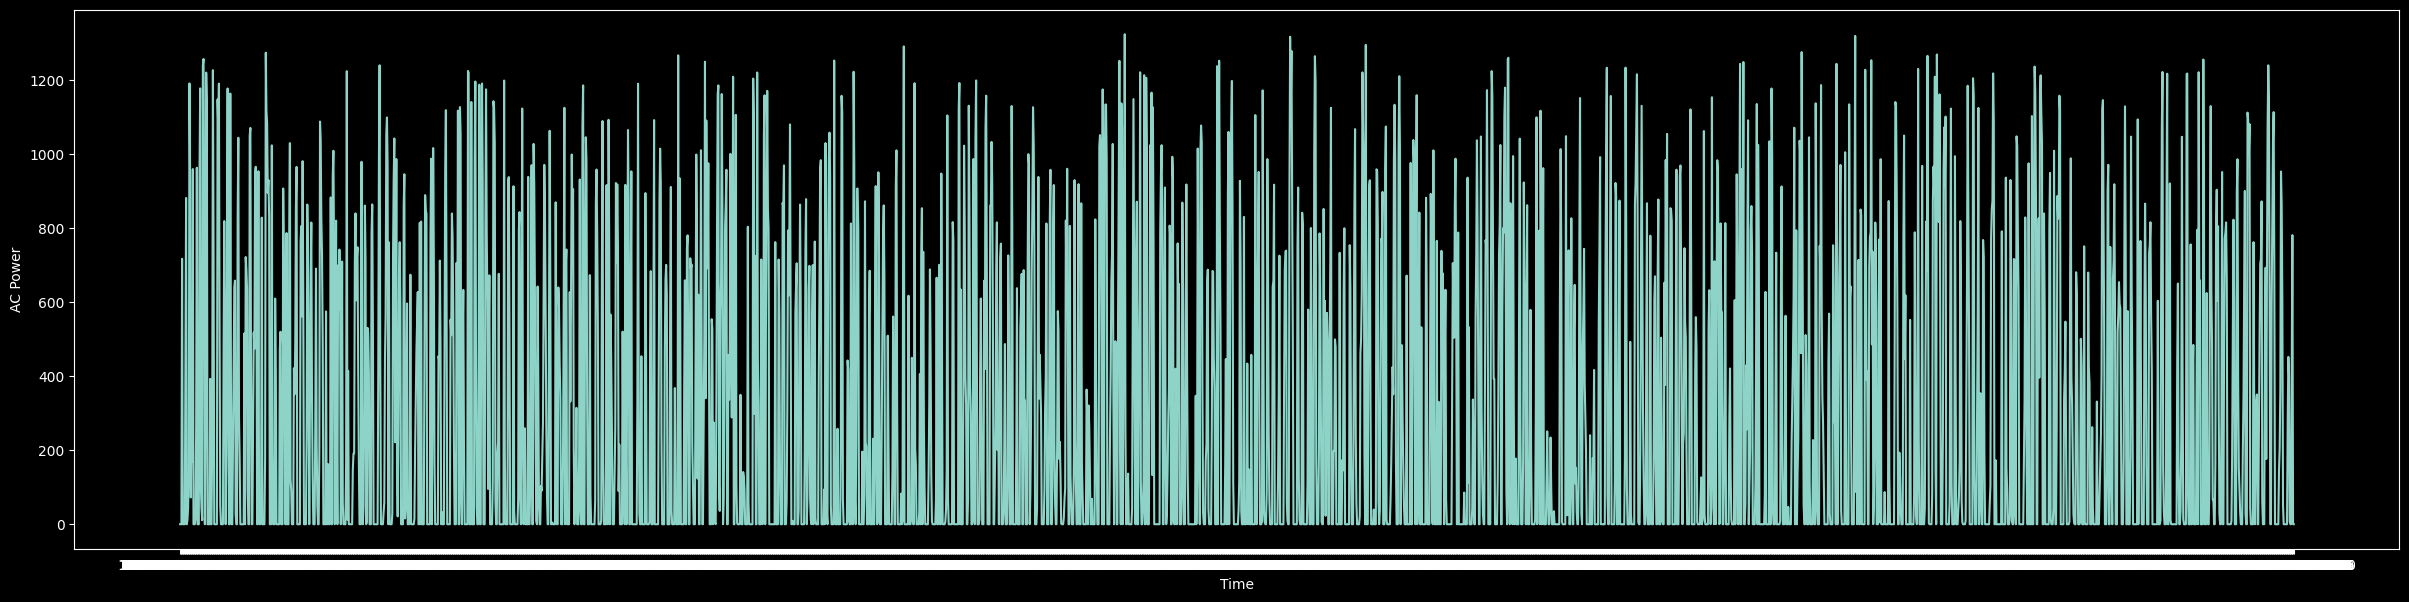

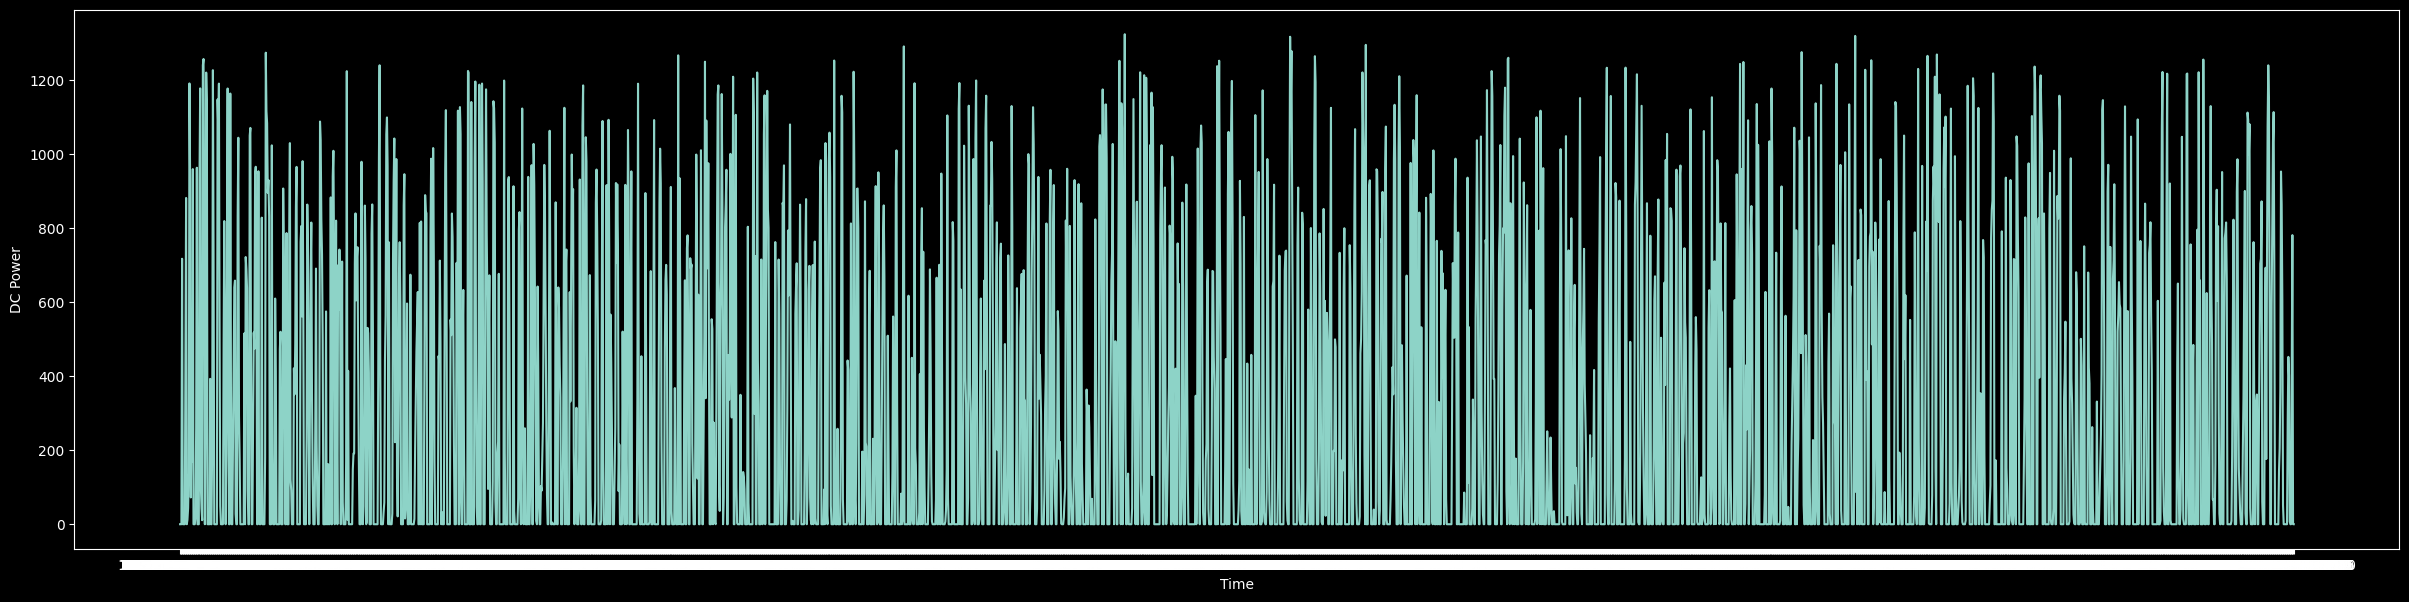

In [39]:
plt.figure(figsize=(30, 7))
plt.plot(df_agg["DATE_TIME"], df_agg["AVG_DAILY_YIELD"])
plt.xlabel("Time")
plt.ylabel("Daily Yield")
plt.show()

plt.figure(figsize=(30, 7))
plt.plot(df_agg["DATE_TIME"], df_agg["AVG_AC_POWER"])
plt.xlabel("Time")
plt.ylabel("AC Power")
plt.show()

plt.figure(figsize=(30, 7))
plt.plot(df_agg["DATE_TIME"], df_agg["AVG_AC_POWER"])
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.show()

In [6]:
df_agg2 = df.copy()
df_agg2[['DATE', 'TIME']] = df['DATE_TIME'].str.split(' ', expand=True)

df_agg2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,15-05-2020,00:00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,15-05-2020,00:00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,15-05-2020,00:00
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,15-05-2020,00:00
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,15-05-2020,00:00


In [20]:
%%sql
SELECT SOURCE_KEY, TIME, AVG(DAILY_YIELD) AVG_DAILY_YIELD FROM df_agg2
WHERE DAILY_YIELD != 0
GROUP BY SOURCE_KEY, TIME
ORDER BY SOURCE_KEY, TIME;

,SOURCE_KEY,TIME,AVG_DAILY_YIELD
0,1BY6WEcLGh8j5v7,00:00,870.661654
1,1BY6WEcLGh8j5v7,06:00,0.582483
2,1BY6WEcLGh8j5v7,06:15,4.946544
3,1BY6WEcLGh8j5v7,06:30,16.857143
4,1BY6WEcLGh8j5v7,06:45,37.259115
...,...,...,...
1594,zVJPv84UY57bAof,22:45,7193.037037
1595,zVJPv84UY57bAof,23:00,7129.615385
1596,zVJPv84UY57bAof,23:15,7176.200000
1597,zVJPv84UY57bAof,23:30,7176.200000


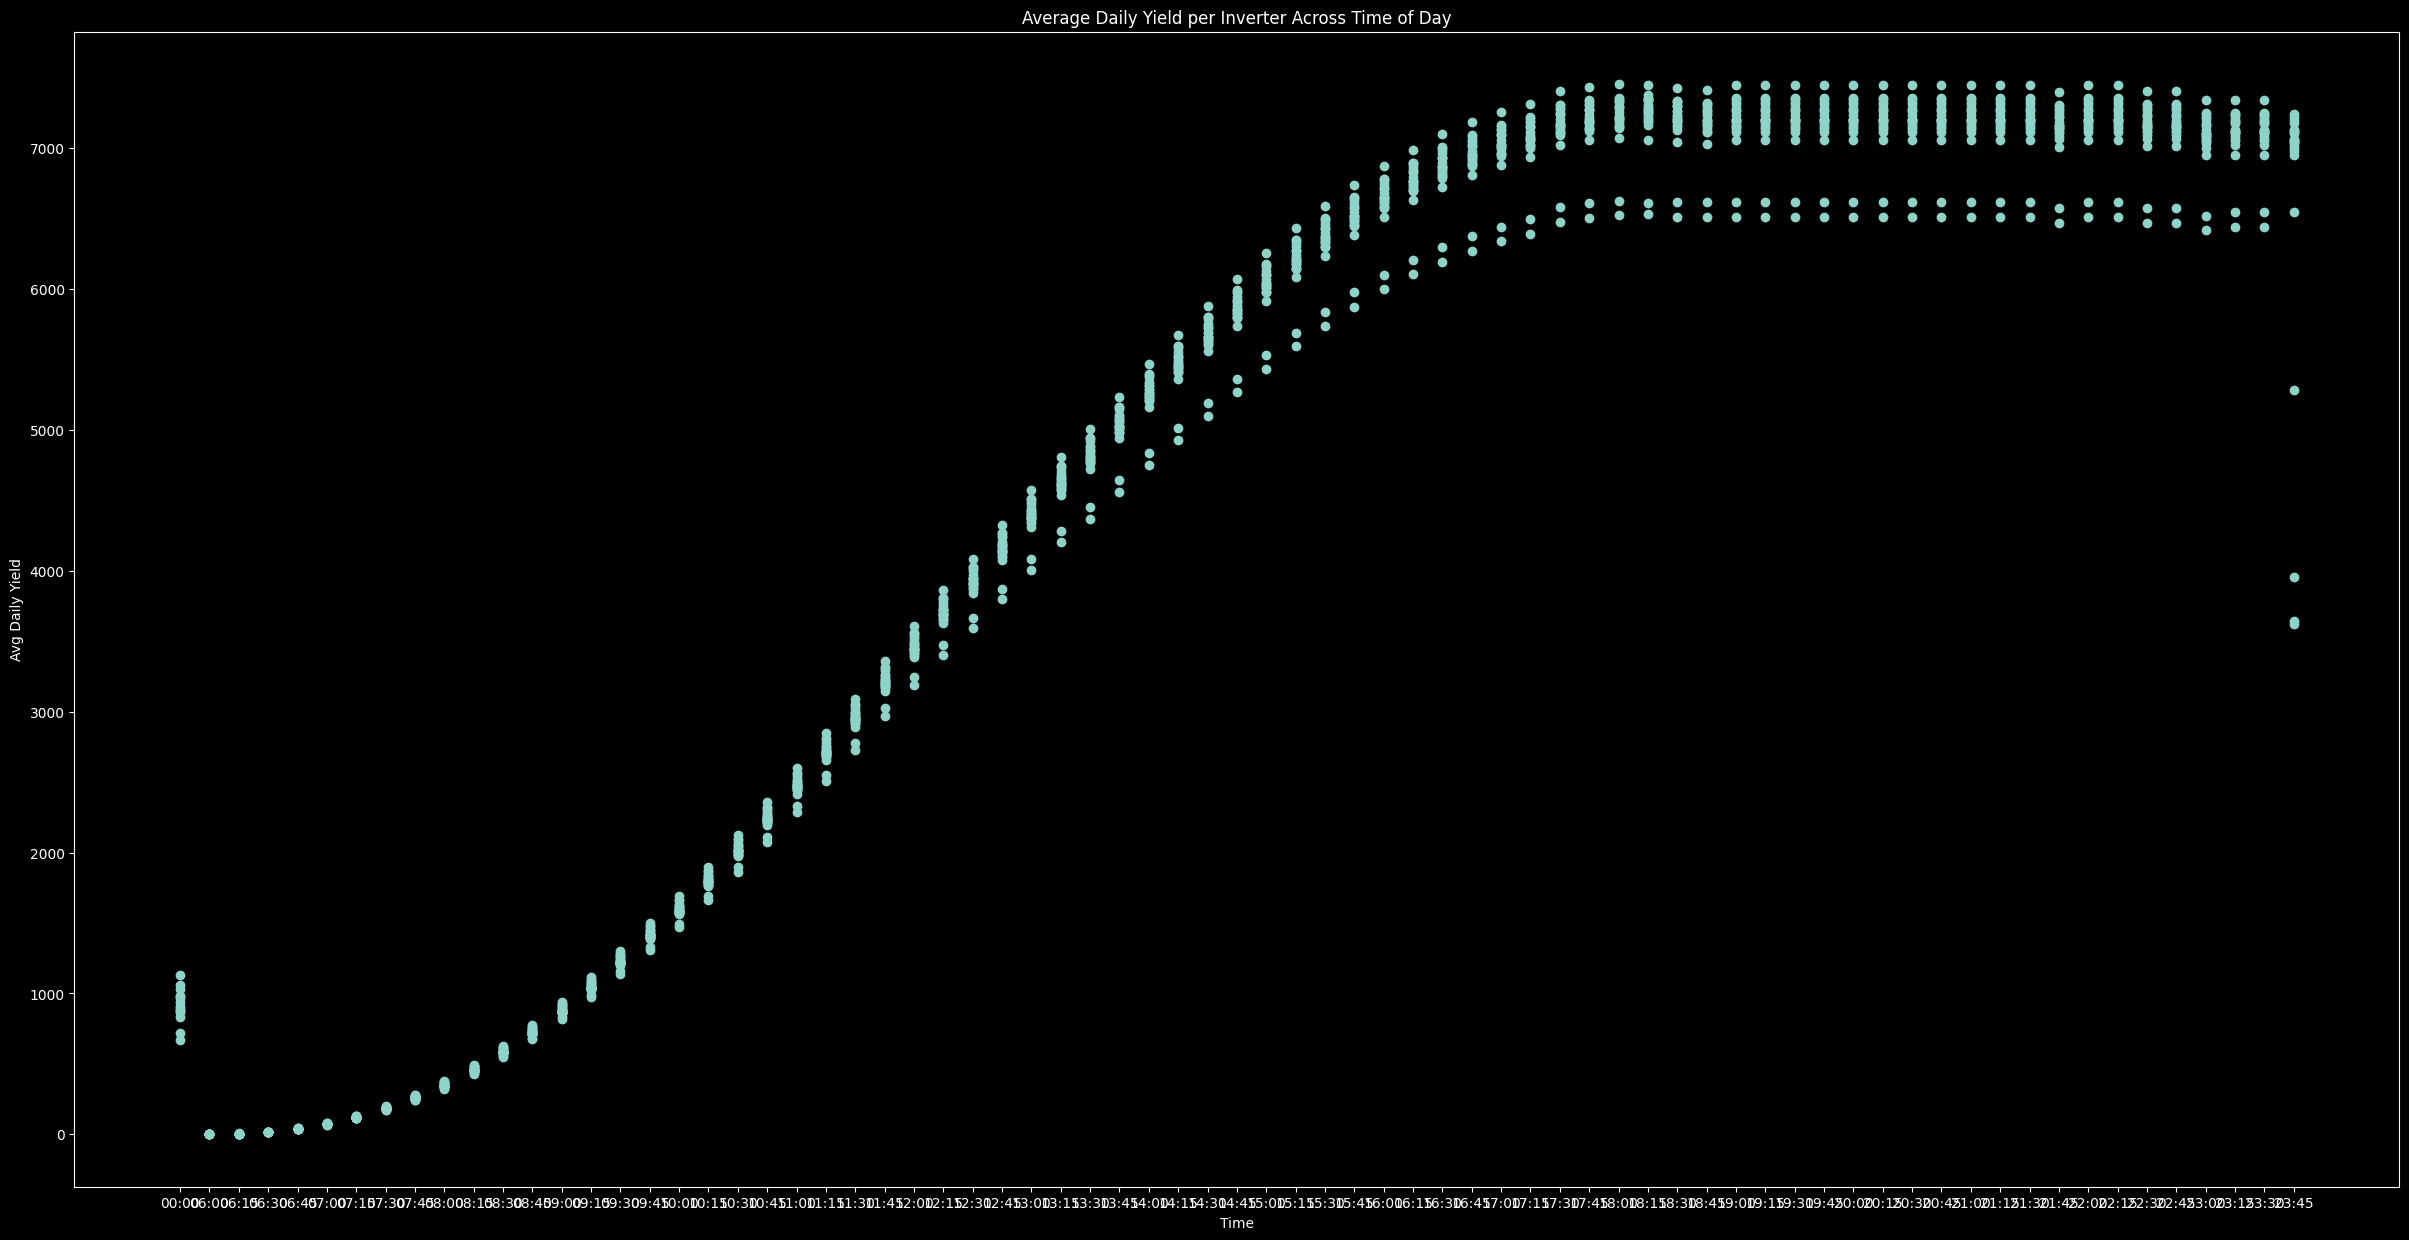

In [23]:
plt.figure(figsize=(30, 15))
plt.scatter(df_sql1["TIME"], df_sql1["AVG_DAILY_YIELD"])
plt.xlabel("Time")
plt.ylabel("Avg Daily Yield")
plt.title("Average Daily Yield per Inverter Across Time of Day")
plt.show()

In [25]:
%%sql
SELECT SOURCE_KEY, DATE_TIME, AC_POWER, DAILY_YIELD FROM df_agg2
WHERE SOURCE_KEY = '1BY6WEcLGh8j5v7' AND (TIME = '21:00' OR TIME = '23:00')
ORDER BY SOURCE_KEY, DATE_TIME;

,SOURCE_KEY,DATE_TIME,AC_POWER,DAILY_YIELD
0,1BY6WEcLGh8j5v7,01-06-2020 21:00,0.0,5508.0
1,1BY6WEcLGh8j5v7,01-06-2020 23:00,0.0,5508.0
2,1BY6WEcLGh8j5v7,02-06-2020 21:00,0.0,7029.0
3,1BY6WEcLGh8j5v7,02-06-2020 23:00,0.0,7029.0
4,1BY6WEcLGh8j5v7,03-06-2020 21:00,0.0,7341.0
...,...,...,...,...
61,1BY6WEcLGh8j5v7,29-05-2020 23:00,0.0,7564.0
62,1BY6WEcLGh8j5v7,30-05-2020 21:00,0.0,6754.0
63,1BY6WEcLGh8j5v7,30-05-2020 23:00,0.0,6754.0
64,1BY6WEcLGh8j5v7,31-05-2020 21:00,0.0,5803.0


In [29]:
%%sql
SELECT SOURCE_KEY, DATE_TIME, AC_POWER, DAILY_YIELD,
    SUM(AC_POWER / 4) OVER (
        PARTITION BY DATE
        ORDER BY TIME
    )
FROM df_agg2
WHERE SOURCE_KEY = '1BY6WEcLGh8j5v7';

,SOURCE_KEY,DATE_TIME,AC_POWER,DAILY_YIELD,"sum((AC_POWER / 4)) OVER (PARTITION BY DATE ORDER BY ""TIME"")"
0,1BY6WEcLGh8j5v7,29-05-2020 06:15,45.500000,1.200000,11.375000
1,1BY6WEcLGh8j5v7,29-05-2020 06:30,88.937500,17.375000,33.609375
2,1BY6WEcLGh8j5v7,29-05-2020 06:45,140.214286,45.285714,68.662946
3,1BY6WEcLGh8j5v7,29-05-2020 07:00,181.275000,87.000000,113.981696
4,1BY6WEcLGh8j5v7,29-05-2020 07:15,183.057143,132.285714,159.745982
...,...,...,...,...,...
3149,1BY6WEcLGh8j5v7,30-05-2020 22:45,0.000000,6754.000000,6763.673214
3150,1BY6WEcLGh8j5v7,30-05-2020 23:00,0.000000,6754.000000,6763.673214
3151,1BY6WEcLGh8j5v7,30-05-2020 23:15,0.000000,6754.000000,6763.673214
3152,1BY6WEcLGh8j5v7,30-05-2020 23:30,0.000000,6754.000000,6763.673214
